See https://sydneybiox.github.io/MoleculeExperiment/articles/MoleculeExperiment.html for more information.

Installation can take >10min. Please be patient.

In [1]:
if (!requireNamespace("remotes", quietly = TRUE))
    install.packages("remotes")

if (!requireNamespace("MoleculeExperiment", quietly = TRUE)) {
  # BiocManager::install("MoleculeExperiment")
  remotes::install_github("SydneyBioX/MoleculeExperiment")
}

In [2]:
library(MoleculeExperiment)
library(ggplot2)

In [3]:
repoDir <- system.file("extdata", package = "MoleculeExperiment")
repoDir <- paste0(repoDir, "/xenium_V1_FF_Mouse_Brain")

me <- readXenium(repoDir,
  keepCols = "essential"
)
me

178 unique features across all samples in assay detected: 2010300C02Rik Acsbg1
Adamts2 Adamtsl1 Angpt1 Aqp4...
869.5 molecules on average across all samples in assay detected


class:  MoleculeExperiment 
2 samples: sample1 sample2 

@molecules contents: 
-detected assay:
Location range across all samples in assay "detected": [4900,4919.98] x [6400.02,6420]

@boundaries contents:
-cell:
7 unique segment IDs: 67500 67512 67515 67521 67527 ...

cell assay boundaries were retrieved.
ℹ Other boundary assays can be retrieved by specifying the `assayName`
  argument.
detected assay transcripts were retrieved.
ℹ Other transcript assays can be retrieved by specifying the `assayName`
  argument.


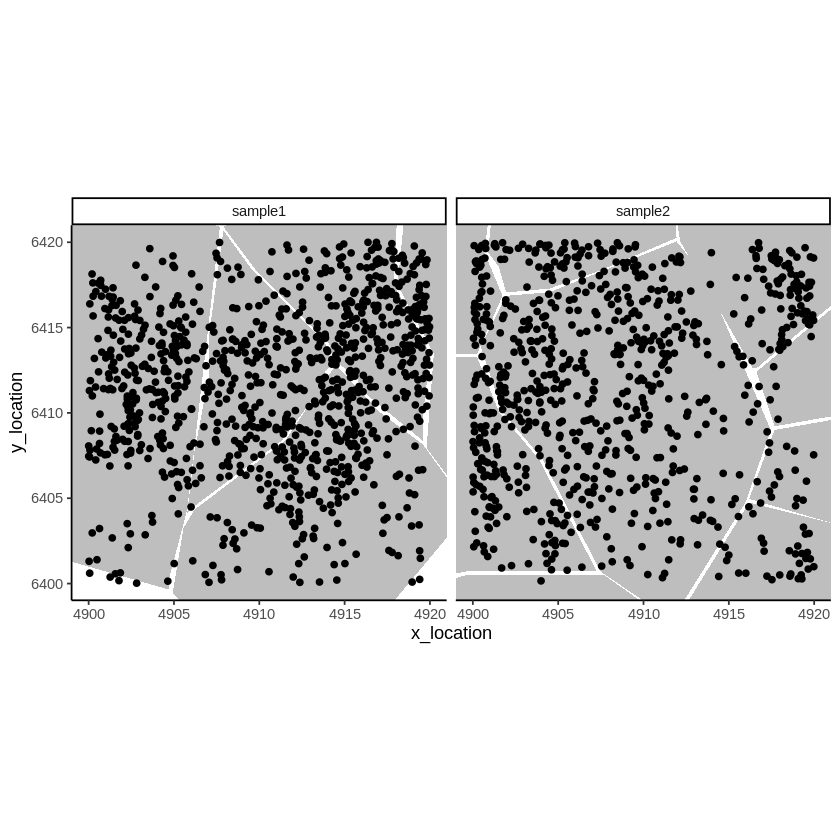

In [4]:
ggplot_me() +
  geom_polygon_me(me, assayName = "cell", fill = "grey") +
  geom_point_me(me) +
  # zoom in to selected patch area
  coord_cartesian(
    xlim = c(4900, 4919.98),
    ylim = c(6400.02, 6420)
  )

In [5]:
# transform ME to SPE object
spe <- countMolecules(me)
spe

detected assay transcripts were retrieved.
ℹ Other transcript assays can be retrieved by specifying the `assayName`
  argument.
cell assay boundaries were retrieved.
ℹ Other boundary assays can be retrieved by specifying the `assayName`
  argument.


class: SpatialExperiment 
dim: 178 14 
metadata(0):
assays(1): counts
rownames(178): 2010300C02Rik Acsbg1 ... Zfp536 Zfpm2
rowData names(0):
colnames(14): sample1.67500 sample1.67512 ... sample2.65070
  sample2.65071
colData names(4): sample_id cell_id x_location y_location
reducedDimNames(1): spatial
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : x_location y_location
imgData names(0):

In [6]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /srv/scratch/benjaminr/anaconda3/envs/ghent_hackathon_mixed/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.3            MoleculeExperiment_1.1.3

loaded via a namespace (and not attached):
 [1] MatrixGenerics_1.10.0       Biobase_2.58.0             
 [3] edgeR_3.40.2                bit64_4.0.5                
 [5] jsonlite_1.8.7              DelayedMatrixStats_1.20.